In [142]:
###########
#Imports and Setup
###########
import tensorflow as tf
from tensorflow.keras import models, datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime

channel = 3

batch_size_value = 32
res= 64 ###Adjust Resolution if neccessary

#training_data = np.load(dir + "training_data_{}_augmented.npy".format(res), allow_pickle=True)
#print(training_data.shape)
class_names = ["Air", "Water"]
###########
#Read Pickels
###########
import pickle
model_real_name = "Good_Frames_Einzel_HSV_64" ##### NAME HERE

# Allframes = {}  # Create an empty dictionary
# with open('/home/dl4/Task2/'+"All_frames_Doppel_RGB_32.pkl", 'rb') as f:
#     Allframes.update(pickle.load(f))   # Update contents of file1 to the dictionary
# with open('/home/dl4/Task2/'+"All_frames_Einzel_RGB_32.pkl", 'rb') as f:
#     Allframes.update(pickle.load(f))   # Update contents of file2 to the dictionary
# Allframes_frames = Allframes["frames"]
# Allframes_labels = Allframes["label"]


with open('/home/dl4/Task2/'+model_real_name+".pkl", 'rb') as f:
    Allframes = pickle.load(f)    
    Allframes_frames = Allframes["frames"]
    Allframes_labels = Allframes["label"]
    #print(allframes[0])
print("Pickels read feritg")
###########
#Trainings-Split
###########
from sklearn.model_selection import train_test_split
import os
import cv2
import numpy as np
from tqdm import tqdm

X = np.array(Allframes_frames)
y = np.array(Allframes_labels)

train_image, test_image, train_label, test_label = train_test_split(
X, y, test_size=0.2, random_state=42)

#print(train_image.shape)
#print(test_image.shape)
print("Training-Split feritg")
###########
#Bilder fuellen
###########
bilder = len(train_image)
# Array-"Korpus" mit der TensorFlow-gerechten Form instanziieren um diese mit den Daten zu befüllen
train_img = np.zeros((bilder ,res ,res, 3))
# Befüllen des richtig-formatierten Arrays
for i,img in enumerate(train_image):
    train_img[i]= img
#print(train_img.shape)  
###########
#Normalization
###########
train_img = train_img/255
print("Normalisierung feritg")


###########
#Model Training
###########
# Datentyp für tensorflow anpassen
x = np.asarray(train_img).astype(np.float32)
y = np.asarray(train_label).astype(np.float32)
print(x.shape)

# Modellname
#model_name = "model_{}_test1".format(res) #old
model_name = model_real_name +"_model"

# Anzahl der Labels (für den Outputlayer)
num_classes = 2

"""few_layers"""
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(res, res, channel))) 
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes))
model.summary()

# """standard"""
# model = models.Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(res, res, channel)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dense(num_classes))
# model.summary()

# """minimal"""
# model = models.Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(res, res, channel))) 
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(num_classes))
# model.summary()

# """minimal_1"""
# model = models.Sequential()
# model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(res, res, channel))) 
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(num_classes))
# model.summary()

# """minimal_2"""
# model = models.Sequential()
# model.add(Conv2D(32, (7, 7), activation='relu', input_shape=(res, res, channel))) 
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(num_classes))
# model.summary()

#Modell kompilieren
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Log Speicherpfad
log_dir = "/home/dl4/Task2/Modelle/BastianTest/Logs/"+ model_real_name+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

#Modell trainieren
history = model.fit(x, y, epochs=12, validation_split=0.2, batch_size=batch_size_value,callbacks=[tensorboard_callback])


#Modell speichern
##model.save('/home/dl4/Task2/Modelle/{}'.format(model_name))
model.save('/home/dl4/Task2/Modelle/BastianTest/{}'.format(model_name))

print("Modelbuilding read fertig")
###########
#Model Testing
###########
bilder = len(test_image)
# Array-"Korpus" mit der TensorFlow-gerechten Form instanziieren um diese mit den Daten zu befüllen
test_img = np.zeros((bilder,res ,res , 3))
# Befüllen des richtig-formatierten Arrays
for i,img in enumerate(test_image):
    test_img[i]= img

print(test_img.shape)

## Features normalisieren
test_img = test_img/255

#Datentyp für tf anpassen
x = np.asarray(test_img).astype(np.float32)
y = np.asarray(test_label).astype(np.float32)

#Gespeichertes Modell aufrufen
new_model = tf.keras.models.load_model('/home/dl4/Task2/Modelle/BastianTest/{}'.format(model_name))
#new_model.summary()

# Modell testen
print(model_name)
test_loss, test_acc = new_model.evaluate(x,  y, verbose=1)
print('Restored model, accuracy: {:5.2f}%'.format(100 * test_acc))




Pickels read feritg
Training-Split feritg
Normalisierung feritg
(23768, 64, 64, 3)
Model: "sequential_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_47 (Flatten)         (None, 30752)             0         
_________________________________________________________________
dense_83 (Dense)             (None, 64)                1968192   
_________________________________________________________________
dense_84 (Dense)             (None, 2)                 130       
Total params: 1,969,218
Trainable params: 1,969,218
Non-trainable params: 0
_________________________________________________________________
Epoch 1/12
595/595 [======

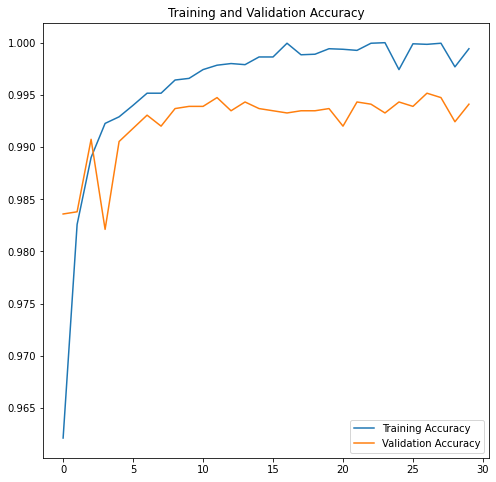

In [141]:
#Übersicht der Epochen
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
#plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()
# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()



In [11]:
print(test_image.shape)
print(test_image[0])
print(test_img.shape)
print(test_img[0])
print(test_label.shape)

(2032, 64, 64, 3)
[[[148 145 174]
  [ 92 108 119]
  [ 61 104 145]
  ...
  [ 43 120 201]
  [ 41 122 195]
  [ 51 129 194]]

 [[184 169 179]
  [ 99 115 140]
  [ 78 135 191]
  ...
  [ 46 120 207]
  [ 50 127 208]
  [ 54 127 203]]

 [[151 140 149]
  [101 122 157]
  [ 90 151 210]
  ...
  [ 47 130 214]
  [ 52 134 218]
  [ 57 132 212]]

 ...

 [[ 47 138 221]
  [ 49 137 221]
  [ 53 136 222]
  ...
  [ 42 164 246]
  [ 42 162 245]
  [ 46 160 240]]

 [[ 42 136 216]
  [ 44 135 218]
  [ 47 135 221]
  ...
  [ 42 164 246]
  [ 38 165 245]
  [ 41 162 240]]

 [[ 33 131 212]
  [ 36 132 213]
  [ 37 131 215]
  ...
  [ 42 164 246]
  [ 38 165 245]
  [ 41 162 240]]]
(8127, 64, 64, 3)
[[[0.58039216 0.56862745 0.68235294]
  [0.36078431 0.42352941 0.46666667]
  [0.23921569 0.40784314 0.56862745]
  ...
  [0.16862745 0.47058824 0.78823529]
  [0.16078431 0.47843137 0.76470588]
  [0.2        0.50588235 0.76078431]]

 [[0.72156863 0.6627451  0.70196078]
  [0.38823529 0.45098039 0.54901961]
  [0.30588235 0.52941176 0.749

Pickle read sucessfully!
(42123, 64, 64, 3)
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


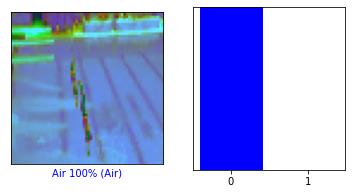

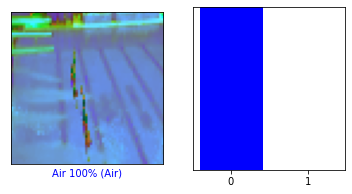

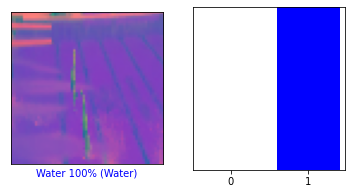

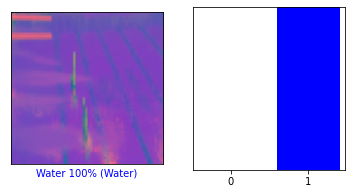

In [148]:
######################################
#Eintauchbilder anschauen
import pickle
model_real_name = "All_good_frames_HLS_64"

with open('/home/dl4/Task2/'+model_real_name+".pkl", 'rb') as f:
    Allframes = pickle.load(f)    
    Allframes_frames = Allframes["frames"]
    Allframes_labels = Allframes["label"]
    #print(allframes[0])
print("Pickle read sucessfully!")


####Test img
bilder2 = len(Allframes_frames)
res2=64

# Array-"Korpus" mit der TensorFlow-gerechten Form instanziieren um diese mit den Daten zu befüllen
test_img2 = np.zeros((bilder2,res2 ,res2 , 3))
# Befüllen des richtig-formatierten Arrays
for i,img in enumerate(Allframes_frames):
    test_img2[i]= img
print(test_img2.shape)
## Features normalisieren
test_img = test_img2/255


#Gespeichertes Modell aufrufen
model_prediction_name = "All_good_frames_HLS_64"+"_model"

new_model = tf.keras.models.load_model('/home/dl4/Task2/Modelle/BastianTest/{}'.format(model_prediction_name))
#new_model.summary()
probability_model = tf.keras.Sequential([new_model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_img2)

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(2))
  plt.yticks([])
  thisplot = plt.bar(range(2), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

for i in range(147,151):
#i = 199
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], Allframes_labels, Allframes_frames)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  Allframes_labels)
    plt.show()



Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Water
This image most likely belongs to Water with a 100.00 percent confidence.


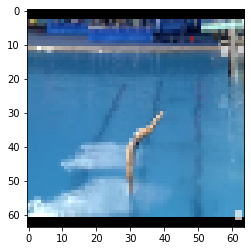

In [162]:
#Einzelne Bilder klassifir´zieren
import tensorflow as tf
from tensorflow.keras import models, datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime

#Gespeichertes Modell aufrufen
#model_prediction_name = "All_frames_RGB_64"+"_model"
model_prediction_name = "Good_Frames_Einzel_HSV_64"+"_model"
path = "/home/dl4/Task2/Model_real_test/test_air2.png"
img_width = 64
img_height = 64

new_model = tf.keras.models.load_model('/home/dl4/Task2/Modelle/BastianTest/{}'.format(model_prediction_name))

img = tf.keras.preprocessing.image.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = new_model.predict(img_array)
score = tf.nn.softmax(predictions[0])
plt.imshow(img)
print(class_names[np.argmax(score)])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Frame: 80 Air


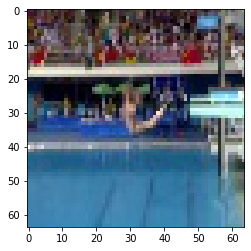

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Frame: 81 Air


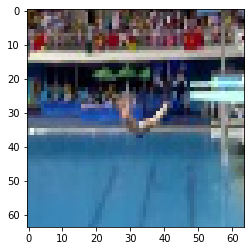

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Frame: 82 Air


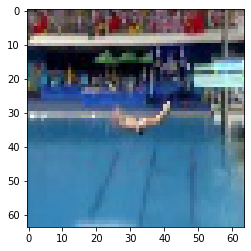

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Frame: 83 Air


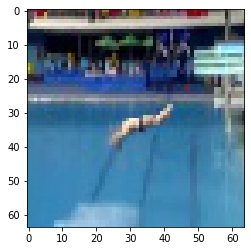

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Frame: 84 Air


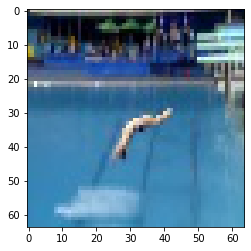

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Frame: 85 Water


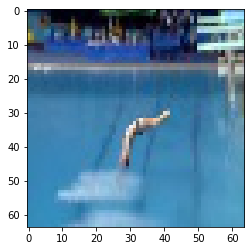

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Frame: 86 Water


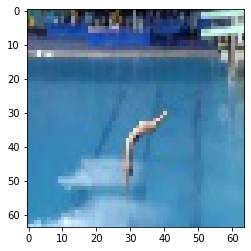

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Frame: 87 Water


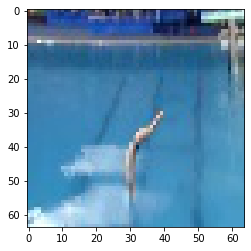

In [190]:
#Praxistest
import warnings
warnings.filterwarnings("ignore")
images_array =[]

for i in range(80,88):
    model_prediction_name = "Good_Frames_Einzel_HSV_64"+"_model"
    path = "/home/dl4/Task2/Model_real_test/TestFrames/" + str(i)+ '.jpg'
    img_width = 64
    img_height = 64

    new_model = tf.keras.models.load_model('/home/dl4/Task2/Modelle/BastianTest/{}'.format(model_prediction_name))

    img = tf.keras.preprocessing.image.load_img(path, target_size=(img_height, img_width))
    
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = new_model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    
    #images_array.append(img)
    
    #print(i, class_names[np.argmax(score)])
    plt.imshow(img)
    print("Frame: "+str(i)+" "+class_names[np.argmax(score)])
    plt.show()
    

In [165]:
#Test Clip in frames
import cv2
import os
path="/home/dl4/Task2/Model_real_test"
#schleife durchläuft alle videos

#die Methode cv2.VideoCapture greift auf die einzelnen Videos zu
vidcap = cv2.VideoCapture('/home/dl4/Task2/Model_real_test/cut_clip1.mp4')
#Vicap.read() prüft, ob das Bild des Videos geladen ist und gibt die aktuelle Bilddatei zurück
success, image = vidcap.read()
count = 1
#erstellt pro Video ein Ordner
#os.makedirs('Video_Frames/video_data'+str(i))
#Alle Bilder werden geladen und gespeichert

while success:
    image = cv2.resize(image, (64, 64))
    cv2.imwrite('/home/dl4/Task2/Model_real_test/TestFrames/'+str(count)+'.jpg',image)
    success, image = vidcap.read()
    print('Saved image ', count)
    count += 1

Saved image  1
Saved image  2
Saved image  3
Saved image  4
Saved image  5
Saved image  6
Saved image  7
Saved image  8
Saved image  9
Saved image  10
Saved image  11
Saved image  12
Saved image  13
Saved image  14
Saved image  15
Saved image  16
Saved image  17
Saved image  18
Saved image  19
Saved image  20
Saved image  21
Saved image  22
Saved image  23
Saved image  24
Saved image  25
Saved image  26
Saved image  27
Saved image  28
Saved image  29
Saved image  30
Saved image  31
Saved image  32
Saved image  33
Saved image  34
Saved image  35
Saved image  36
Saved image  37
Saved image  38
Saved image  39
Saved image  40
Saved image  41
Saved image  42
Saved image  43
Saved image  44
Saved image  45
Saved image  46
Saved image  47
Saved image  48
Saved image  49
Saved image  50
Saved image  51
Saved image  52
Saved image  53
Saved image  54
Saved image  55
Saved image  56
Saved image  57
Saved image  58
Saved image  59
Saved image  60
Saved image  61
Saved image  62
Saved image  63
S